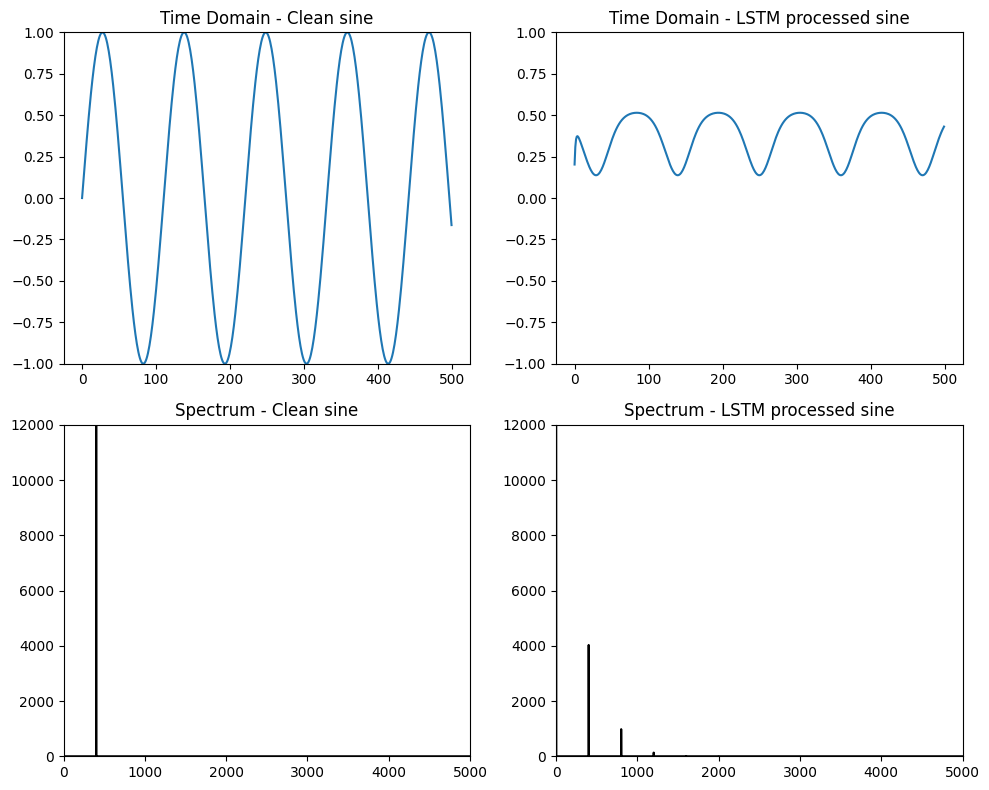

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft

import torch
import numpy as np
from scipy.io.wavfile import write

torch.manual_seed(10)

# synthesize a 400Hz sine at 44,100Hz sample rate
freq = 400
clean_sine = np.sin(np.arange(0, np.pi * freq*2, (np.pi * freq * 2) /44100), dtype=np.float32)

# reshape it so each sample is in its own 
# box [[], [] ... []]
clean_sine = np.reshape(clean_sine, (len(clean_sine), 1))

my_lstm = torch.nn.LSTM(1, 1, 1)
in_t = torch.tensor(clean_sine)

# pass it through the LSTM layer
out_t,hx = my_lstm.forward(in_t)


# # 1. Load the WAV files into arrays
# rate1, data1 = wavfile.read('sine_400Hz.wav')
# rate2, data2 = wavfile.read('sine_400-lstm.wav')

data1 = clean_sine
data2 = out_t.detach().numpy()
rate1 = 44100
rate2 = 44100

td_samples = 500

# If stereo, take one channel
if len(data1.shape) == 2:
    data1 = data1[:, 0]
if len(data2.shape) == 2:
    data2 = data2[:, 0]

# 2. Plot a section of the time domain signal
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(data1[:td_samples])  # Plotting first 5000 samples as an example
plt.title('Time Domain - Clean sine')
plt.ylim([-1, 1])

plt.subplot(2, 2, 2)
plt.plot(data2[:td_samples])
plt.title('Time Domain - LSTM processed sine')
plt.ylim([-1, 1])

# 3. Compute the spectrum
spectrum1 = np.abs(fft(data1))
spectrum2 = np.abs(fft(data2))

# 4. Plot the magnitude spectrum
plt.subplot(2, 2, 3)
plt.plot(spectrum1[:len(spectrum1)//2], color='black')  # Plotting only positive frequencies
plt.title('Spectrum - Clean sine')
plt.xlim([-1, 5000])
plt.ylim([0, 12000])

plt.subplot(2, 2, 4)
plt.plot(spectrum2[:len(spectrum2)//2], color='black')
plt.title('Spectrum - LSTM processed sine')
plt.xlim([-1, 5000])
plt.ylim([0, 12000])

plt.tight_layout()
plt.show()

